In [1]:
import pandas as pd
import numpy as np 
import geopandas as gpd
import matplotlib 
from matplotlib import pyplot as plt 
pd.set_option('display.max_columns',None)
import seaborn as sns 
from shapely.geometry import Point, Polygon 


dataset = pd.read_csv('/srv/data/my_shared_data_folder/rafi/2022_Business_Academic_QCQ_grocery.csv')
dataset.drop(['Unnamed: 0'],inplace=True,axis=1)
dataset

,COMPANY,ADDRESS LINE 1,CITY,STATE,ZIPCODE,ZIP4,COUNTY CODE,AREA CODE,IDCODE,LOCATION EMPLOYEE SIZE CODE,LOCATION SALES VOLUME CODE,PRIMARY SIC CODE,SIC6_DESCRIPTIONS,PRIMARY NAICS CODE,NAICS8 DESCRIPTIONS,SIC CODE,SIC6_DESCRIPTIONS (SIC),SIC CODE 1,SIC6_DESCRIPTIONS (SIC1),SIC CODE 2,SIC6_DESCRIPTIONS(SIC2),SIC CODE 3,SIC6_DESCRIPTIONS(SIC3),SIC CODE 4,SIC6_DESCRIPTIONS(SIC4),ARCHIVE VERSION YEAR,YELLOW PAGE CODE,EMPLOYEE SIZE (5) - LOCATION,SALES VOLUME (9) - LOCATION,BUSINESS STATUS CODE,INDUSTRY SPECIFIC FIRST BYTE,YEAR ESTABLISHED,OFFICE SIZE CODE,COMPANY HOLDING STATUS,ABI,SUBSIDIARY NUMBER,PARENT NUMBER,PARENT ACTUAL EMPLOYEE SIZE,PARENT ACTUAL SALES VOLUME,PARENT EMPLOYEE SIZE CODE,PARENT SALES VOLUME CODE,SITE NUMBER,ADDRESS TYPE INDICATOR,POPULATION CODE,CENSUS TRACT,CENSUS BLOCK,LATITUDE,LONGITUDE,MATCH CODE,CBSA CODE,CBSA LEVEL,CSA CODE,FIPS CODE
0,GOMART,55 POSTAL PLZ,MORGANTOWN,WV,26508,7005.0,61.0,304,2,C,C,541103,CONVENIENCE STORES,44512001.0,CONVENIENCE STORES,554101.0,SERVICE STATIONS-GASOLINE & OIL,554110.0,ALTERNATIVE FUELS,NaN,NaN,NaN,NaN,NaN,NaN,2022,21303.0,13.0,2482.0,2,NaN,NaN,NaN,NaN,998372387,NaN,124929449.0,50.0,389500.0,E,I,998372387.0,NaN,7,11000.0,3.0,39.594376,-79.954437,P,34060.0,2.0,390.0,54061.0
1,7-ELEVEN,485 E MAIN ST,EL CENTRO,CA,92243,2619.0,25.0,760,2,B,C,541103,CONVENIENCE STORES,44512001.0,CONVENIENCE STORES,554101.0,SERVICE STATIONS-GASOLINE & OIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,6.0,1273.0,2,W,NaN,NaN,NaN,495660326,NaN,5863311.0,800.0,1272634.0,H,K,495660326.0,NaN,7,11400.0,3.0,32.792679,-115.536058,0,20940.0,2.0,0.0,6025.0
2,EL SOL MARKET,110 W MAIN ST,WESTMORLAND,CA,92281,NaN,25.0,760,2,B,C,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,39106.0,5.0,1061.0,9,NaN,NaN,NaN,NaN,519605455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,10200.0,1.0,33.051800,-115.581800,X,20940.0,2.0,0.0,6025.0
3,COOL SPRINGS GROCERY,241 WILDWOOD ST,MORGANTOWN,WV,26505,3141.0,61.0,304,2,A,A,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,39106.0,2.0,382.0,9,NaN,NaN,NaN,NaN,817953730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,10400.0,4.0,39.652885,-79.986398,P,34060.0,2.0,390.0,54061.0
4,CIRCLE K,123 E MAIN ST,WESTMORLAND,CA,92281,NaN,25.0,760,2,B,C,541103,CONVENIENCE STORES,44512001.0,CONVENIENCE STORES,554101.0,SERVICE STATIONS-GASOLINE & OIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,6.0,1273.0,2,F,NaN,NaN,NaN,855113817,NaN,450720289.0,650.0,4981020.0,H,J,NaN,NaN,3,10200.0,1.0,33.051800,-115.581800,X,20940.0,2.0,0.0,6025.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203498,H-E-B,1434 W WELLS BRANCH PKWY,PFLUGERVILLE,TX,78660,3153.0,453.0,512,2,G,H,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,554101.0,SERVICE STATIONS-GASOLINE & OIL,729954.0,VEHICLE & DRIVERS LICENSING SERVICES,581208.0,RESTAURANTS,NaN,NaN,NaN,NaN,2022,39106.0,270.0,71857.0,2,F,NaN,NaN,NaN,403451198,NaN,436443592.0,1000.0,23000000.0,I,K,403451198.0,NaN,8,1840.0,3.0,30.442331,-97.664580,P,12420.0,2.0,0.0,48453.0
203499,ELECTRIC CHARGING STATION,1A LAKEVIEW DR,HALFMOON,NY,12065,4101.0,91.0,518,2,NaN,NaN,554112,ELECTRIC CHARGING STATION,44719010.0,OTHER GASOLINE STATIONS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,NaN,0.0,9,J,NaN,NaN,NaN,739034319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,62405.0,1.0,42.851508,-73.767767,0,10580.0,2.0,104.0,36091.0
203500,SAC N PAC,2101 N STATE HIGHWAY 123,SAN MARCOS,TX,78666,1441.0,209.0,512,2,A,A,541103,CONVENIENCE STORES,44512001.0,CONVENIENCE STORES,541105.0,GROCERS-RETAIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,21303.0,1.0,304.0,2,NaN,NaN,NaN,NaN,898604384,625576871.0,5863311.0,800.0,1272634.0,H,K,729087954.0,NaN,8,10400.0,3.0,29.845163,-97.940228,P,12420.0,2.0

In [2]:
stores_2022 = pd.read_csv('/srv/data/my_shared_data_folder/rafi/2022_Business_Academic_QCQ_grocery.csv')
stores_2022.drop(['Unnamed: 0'],inplace=True,axis=1)
territories = ['PR', 'FM', 'MP', 'GU', 'VI', 'MH']
stores_2022 = stores_2022.drop(stores_2022[stores_2022['STATE'].isin(territories)].index)
stores_2022.head(10)

,COMPANY,ADDRESS LINE 1,CITY,STATE,ZIPCODE,ZIP4,COUNTY CODE,AREA CODE,IDCODE,LOCATION EMPLOYEE SIZE CODE,LOCATION SALES VOLUME CODE,PRIMARY SIC CODE,SIC6_DESCRIPTIONS,PRIMARY NAICS CODE,NAICS8 DESCRIPTIONS,SIC CODE,SIC6_DESCRIPTIONS (SIC),SIC CODE 1,SIC6_DESCRIPTIONS (SIC1),SIC CODE 2,SIC6_DESCRIPTIONS(SIC2),SIC CODE 3,SIC6_DESCRIPTIONS(SIC3),SIC CODE 4,SIC6_DESCRIPTIONS(SIC4),ARCHIVE VERSION YEAR,YELLOW PAGE CODE,EMPLOYEE SIZE (5) - LOCATION,SALES VOLUME (9) - LOCATION,BUSINESS STATUS CODE,INDUSTRY SPECIFIC FIRST BYTE,YEAR ESTABLISHED,OFFICE SIZE CODE,COMPANY HOLDING STATUS,ABI,SUBSIDIARY NUMBER,PARENT NUMBER,PARENT ACTUAL EMPLOYEE SIZE,PARENT ACTUAL SALES VOLUME,PARENT EMPLOYEE SIZE CODE,PARENT SALES VOLUME CODE,SITE NUMBER,ADDRESS TYPE INDICATOR,POPULATION CODE,CENSUS TRACT,CENSUS BLOCK,LATITUDE,LONGITUDE,MATCH CODE,CBSA CODE,CBSA LEVEL,CSA CODE,FIPS CODE
0,GOMART,55 POSTAL PLZ,MORGANTOWN,WV,26508,7005.0,61.0,304,2,C,C,541103,CONVENIENCE STORES,44512001.0,CONVENIENCE STORES,554101.0,SERVICE STATIONS-GASOLINE & OIL,554110.0,ALTERNATIVE FUELS,NaN,NaN,NaN,NaN,NaN,NaN,2022,21303.0,13.0,2482.0,2,NaN,NaN,NaN,NaN,998372387,NaN,124929449.0,50.0,389500.0,E,I,998372387.0,NaN,7,11000.0,3.0,39.594376,-79.954437,P,34060.0,2.0,390.0,54061.0
1,7-ELEVEN,485 E MAIN ST,EL CENTRO,CA,92243,2619.0,25.0,760,2,B,C,541103,CONVENIENCE STORES,44512001.0,CONVENIENCE STORES,554101.0,SERVICE STATIONS-GASOLINE & OIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,6.0,1273.0,2,W,NaN,NaN,NaN,495660326,NaN,5863311.0,800.0,1272634.0,H,K,495660326.0,NaN,7,11400.0,3.0,32.792679,-115.536058,0,20940.0,2.0,0.0,6025.0
2,EL SOL MARKET,110 W MAIN ST,WESTMORLAND,CA,92281,NaN,25.0,760,2,B,C,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,39106.0,5.0,1061.0,9,NaN,NaN,NaN,NaN,519605455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,10200.0,1.0,33.051800,-115.581800,X,20940.0,2.0,0.0,6025.0
3,COOL SPRINGS GROCERY,241 WILDWOOD ST,MORGANTOWN,WV,26505,3141.0,61.0,304,2,A,A,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,39106.0,2.0,382.0,9,NaN,NaN,NaN,NaN,817953730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,10400.0,4.0,39.652885,-79.986398,P,34060.0,2.0,390.0,54061.0
4,CIRCLE K,123 E MAIN ST,WESTMORLAND,CA,92281,NaN,25.0,760,2,B,C,541103,CONVENIENCE STORES,44512001.0,CONVENIENCE STORES,554101.0,SERVICE STATIONS-GASOLINE & OIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,6.0,1273.0,2,F,NaN,NaN,NaN,855113817,NaN,450720289.0,650.0,4981020.0,H,J,NaN,NaN,3,10200.0,1.0,33.051800,-115.581800,X,20940.0,2.0,0.0,6025.0
5,EL SOL MEAT MARKET,1100 MEADOWS RD # B,CALEXICO,CA,92231,5917.0,25.0,760,2,D,E,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,542107.0,MEAT-RETAIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,29.0,6153.0,9,NaN,NaN,NaN,NaN,995912391,NaN,NaN,NaN,NaN,NaN,NaN,995912391.0,NaN,7,12002.0,2.0,32.679923,-115.482166,P,20940.0,2.0,0.0,6025.0
6,AMPM,73434 29 PALMS HWY,TWENTYNINE PALMS,CA,92277,3129.0,71.0,760,2,C,D,541103,CONVENIENCE STORES,44512001.0,CONVENIENCE STORES,554101.0,SERVICE STATIONS-GASOLINE & OIL,554110.0,ALTERNATIVE FUELS,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,10.0,2631.0,2,A,2004.0,NaN,NaN,547898643,425040557.0,1490291.0,5000.0,7616641.0,J,K,547898643.0,NaN,7,10421.0,1.0,34.135287,-116.059794,P,40140.0,2.0,348.0,6071.0
7,KROGER,1600 S OHIO ST,MARTINSVILLE,IN,46151,3317.0,109.0,765,2,F,G,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,39106.0,102.0,21931.0,2,P,NaN,NaN,NaN,140765967,NaN,7521503.0,1200.0,137888000.0,I,I,140765967.0,NaN,7,510701.0,2.0,39.411880,-86.425148,P,26900.0,2.0,294.0,18109.0
8,FOOD 4 LESS,2420 COTTONWOOD DR,EL CENTRO,CA,92243,1604.0,25.0,760,2,E,F,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,39106.0,70.0,14851.0,2,ï¿½,NaN,NaN,NaN,2

In [3]:
#Filter Grocery stores by sic (starting with 541105 & 531102)
grocery_sic = stores_2022.loc[stores_2022[['PRIMARY SIC CODE']].astype(str).apply(lambda x: x.str.startswith('541105')).any(axis=1)]
grocery_sic.head(10)

,COMPANY,ADDRESS LINE 1,CITY,STATE,ZIPCODE,ZIP4,COUNTY CODE,AREA CODE,IDCODE,LOCATION EMPLOYEE SIZE CODE,LOCATION SALES VOLUME CODE,PRIMARY SIC CODE,SIC6_DESCRIPTIONS,PRIMARY NAICS CODE,NAICS8 DESCRIPTIONS,SIC CODE,SIC6_DESCRIPTIONS (SIC),SIC CODE 1,SIC6_DESCRIPTIONS (SIC1),SIC CODE 2,SIC6_DESCRIPTIONS(SIC2),SIC CODE 3,SIC6_DESCRIPTIONS(SIC3),SIC CODE 4,SIC6_DESCRIPTIONS(SIC4),ARCHIVE VERSION YEAR,YELLOW PAGE CODE,EMPLOYEE SIZE (5) - LOCATION,SALES VOLUME (9) - LOCATION,BUSINESS STATUS CODE,INDUSTRY SPECIFIC FIRST BYTE,YEAR ESTABLISHED,OFFICE SIZE CODE,COMPANY HOLDING STATUS,ABI,SUBSIDIARY NUMBER,PARENT NUMBER,PARENT ACTUAL EMPLOYEE SIZE,PARENT ACTUAL SALES VOLUME,PARENT EMPLOYEE SIZE CODE,PARENT SALES VOLUME CODE,SITE NUMBER,ADDRESS TYPE INDICATOR,POPULATION CODE,CENSUS TRACT,CENSUS BLOCK,LATITUDE,LONGITUDE,MATCH CODE,CBSA CODE,CBSA LEVEL,CSA CODE,FIPS CODE
2,EL SOL MARKET,110 W MAIN ST,WESTMORLAND,CA,92281,NaN,25.0,760,2,B,C,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,39106.0,5.0,1061.0,9,NaN,NaN,NaN,NaN,519605455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,10200.0,1.0,33.051800,-115.581800,X,20940.0,2.0,0.0,6025.0
3,COOL SPRINGS GROCERY,241 WILDWOOD ST,MORGANTOWN,WV,26505,3141.0,61.0,304,2,A,A,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,39106.0,2.0,382.0,9,NaN,NaN,NaN,NaN,817953730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,10400.0,4.0,39.652885,-79.986398,P,34060.0,2.0,390.0,54061.0
5,EL SOL MEAT MARKET,1100 MEADOWS RD # B,CALEXICO,CA,92231,5917.0,25.0,760,2,D,E,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,542107.0,MEAT-RETAIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,29.0,6153.0,9,NaN,NaN,NaN,NaN,995912391,NaN,NaN,NaN,NaN,NaN,NaN,995912391.0,NaN,7,12002.0,2.0,32.679923,-115.482166,P,20940.0,2.0,0.0,6025.0
7,KROGER,1600 S OHIO ST,MARTINSVILLE,IN,46151,3317.0,109.0,765,2,F,G,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,39106.0,102.0,21931.0,2,P,NaN,NaN,NaN,140765967,NaN,7521503.0,1200.0,137888000.0,I,I,140765967.0,NaN,7,510701.0,2.0,39.411880,-86.425148,P,26900.0,2.0,294.0,18109.0
8,FOOD 4 LESS,2420 COTTONWOOD DR,EL CENTRO,CA,92243,1604.0,25.0,760,2,E,F,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,39106.0,70.0,14851.0,2,ï¿½,NaN,NaN,NaN,215261702,402627138.0,7521503.0,1200.0,137888000.0,I,I,215261702.0,NaN,7,11201.0,1.0,32.815719,-115.572166,P,20940.0,2.0,0.0,6025.0
13,KROGER,301 E MCKINLEY RD,OTTAWA,IL,61350,4805.0,99.0,815,2,E,F,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,39106.0,70.0,14158.0,2,P,NaN,NaN,NaN,152123287,NaN,7521503.0,1200.0,137888000.0,I,I,152123287.0,NaN,7,963500.0,1.0,41.323858,-88.836271,P,36837.0,1.0,176.0,17099.0
14,WOODS SUPERMARKET,1407 W AUSTIN BLVD,NEVADA,MO,64772,2805.0,217.0,417,2,E,E,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,542107.0,MEAT-RETAIL,546102.0,BAKERS-RETAIL,591205.0,PHARMACIES,592102.0,LIQUORS-RETAIL,NaN,NaN,2022,39106.0,63.0,9332.0,2,NaN,NaN,NaN,NaN,452808512,NaN,834898306.0,20.0,48500.0,D,G,452808512.0,NaN,6,950300.0,5.0,37.836468,-94.374786,P,0.0,NaN,0.0,29217.0
16,SKY MARKET,1904 E PALOMAR ST # 108,CHULA VISTA,CA,91913,5043.0,73.0,619,2,A,B,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,539901.0,GENERAL MERCHANDISE-RETAIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,3.0,543.0,9,NaN,2017.0,NaN,NaN,724918224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,13313.0,1.0,32.626419,-116.975922,P,41740.0,2.0,0.0,6073.0
23,STATER BROS MARKETS,78630 HIGHWAY 111 # A,LA QUINTA,CA,92253,2049.0,65.0,760,2,F,G,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,NaN,NaN,NaN,NaN,NaN

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
pd.set_option('display.max_columns', None)
from shapely.geometry import Point
import fiona
import math
import plotly.express as px
from thefuzz import fuzz
from thefuzz import process

/opt/tljh/user/lib/python3.9/site-packages/thefuzz/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [5]:
#Read in the data and keep only US Continental States and DC
stores_2022 = pd.read_csv('/srv/data/my_shared_data_folder/rafi/2022_Business_Academic_QCQ_grocery.csv')
stores_2022.drop(['Unnamed: 0'],inplace=True,axis=1)
territories = ['PR', 'FM', 'MP', 'GU', 'VI', 'MH']
stores_2022 = stores_2022.drop(stores_2022[stores_2022['STATE'].isin(territories)].index)

In [6]:
#Create lists of Supermarkets/Companies owned by the Parent Coporations of Interest (Supermarkets/Companies were taken from Wikipedia)

#Ahold Delhaize owned supermarkets/companies
ahold = ["Bottom Dollar Food",
    "Food Lion",
    "FreshDirect",
    "Giant",
    "Giant Food",
    "Hannaford",
    "Stop & Shop",
    "Peapod",
    "Bfresh",
    "Eastside Marketplace",]

#WALMART owned supermarkets/companies
walmart = ["WALMART","SAM'S CLUB"]

#Krogers owned supermarkets/companies
kroger = ["Baker's",
    "City Market",
    "Dillons",
    "Food 4 Less",
    "Foods Co.",
    "Fred Meyer",
    "Fry's",
    "Gerbes",
    "Harris Teeter",
    "JayC",
    "King Soopers",
    "Kroger",
    "Mariano's",
    "Metro Market",
    "Pay Less",
    "Pick 'n Save",
    "QFC",
    "Ralphs",
    "Ruler Foods",
    "Smith's",]

# Albertsons owned supermarkets/companies
albertsons= ["Acme Markets",
    "Albertsons",
    "Albertsons Market",
    "Amigos",
    "Andronico's",
    "Balducci's",
    "Carrs",
    "Haggen",
    "Jewel-Osco",
    "Kings Food Markets",
    "Lucky",
    "Market Street",
    "Pak 'n Save",
    "Pavilions",
    "Randalls",
    "Safewa",
    "Shaw's",
    "Star Market",
    "Tom Thumb",
    "United Supermarkets",
    "Vons",
    "Buttrey Food and Drug",
    "Max Food and Drug",
    "Max Foods",
    "Skagg's Albertsons",
    "Super Saver",]

#Costco owned supermarkets/companies
costco = ["Costco"]

In [7]:
#Apply a string match through thefuzz that compares all stores to the parent corporations owned stores
#We decided to use a threshold of 77
#Generates a list of potential unique string matches
#The matches list's length is based on the number of different stores the parent corporation owns
#parent was initialized for each parent coporation (finished at costco)
'''
parent = costco
companies = stores_2022["COMPANY"]

matches = []
for item in parent:
    for result in process.extract(item, companies, limit=len(parent)+1):
        store = result[0]
        score = result[1]
        if score >= 77 and store not in matches:
            matches.append(store)

print(matches)
'''

'\nparent = costco\ncompanies = stores_2022["COMPANY"]\n\nmatches = []\nfor item in parent:\n    for result in process.extract(item, companies, limit=len(parent)+1):\n        store = result[0]\n        score = result[1]\n        if score >= 77 and store not in matches:\n            matches.append(store)\n\nprint(matches)\n'

In [8]:
#Generated String Matches from above

#String matched brands owned by Walmart:
walmart_string = ['WALMART GROCERY PICKUP', 'WALMART GROCERY PKUP-DELIVERY', "SAM'S CLUB DELI"]

#String matched brands owned by Ahold Delhaize:
ahold_string = ['BOTTOM DOLLAR', 'DOLLAR DOLLAR', 'FOOD', 'FOOD 4 LESS', 'FOOD LION', 'FRESH DIRECT', 'REC', 'FRESH', 'H & H', 'S & S', 'FRESHII', 'GIANT', 'GIANT EAGLE', 'GIANT EAGLE FLORAL', 'GIANT FOOD', 'HANNAFORD', 'STOP & SHOP', 'PEA POD', 'BFRESH MARKET', 'REFRESH', 'EASTSIDE MARKETPLACE', 'WESTSIDE MARKETPLACE', 'MARKET', 'E MARKET', 'MARKETPLACE']

#String matched brands owned by Kroger:
kroger_string = ["BAKER'S", 'S & S', 'BAKERS', "BAKER'S GAS & WELD SUPLS INC", "BAKER'S GAS", "BAKER'S MARKET", "BAKER'S PRO FARM LLC", 'BAKER STREET MARKET', "BAKER'S KWIK SHOP", 'CITY MARKET', 'DILLONS', 'FOOD 4 LESS', 'FOODS CO', 'FRED MEYER', "FRY'S FOOD", 'GERBES SUPER MARKET', 'GERBES SUPER MARKETS', 'GE', 'GERBES SUPERMARKET', 'HARRIS TEETER', 'JAYC', "JAYCEE'S", 'JAYCON', 'CITY-RALEIGH-JAYCEE PARK-CMNTY', 'JAYCE MINIMARKET', 'NAY & JAY', 'KING SOOPERS', 'KROGER', "MARIANO'S", 'METRO MARKET', 'METRO MINI MARKET', 'MARKET MARKET', 'PAY LESS LIQUORS', 'PAY LESS SUPER MARKETS', 'PAY LESS GAS & FOOD', 'PAY LESS IGA', 'FOOD FOR LESS', 'FAR LESS FOOD MARKET', 'MORE FOR LESS', 'PRICE LESS FOODS', 'COST LESS FOODS CO', "PICK'N SAVE", 'QFC', 'RALPHS', 'RULER FOODS', "SMITH'S"]

#String matched brands owned by Costco
costco_string = ["COSTCO DELI"]

#String matched brands owned by Albertsons
albertsons_string = ['ACME MARKETS', 'ALBERTSONS', 'ALBERTSONS MARKET', 'MARKET MARKET', 'MARKET', '2 AMIGOS', 'AMIGO', 'LOS AMIGOS DISTRIBUTING', 'DOS AMIGOS MARKET', '3 AMIGOS BEER WINE-FOOD STORE', 'THREE AMIGOS', 'AMIGOS FOOD MART', 'LOS AMIGOS', 'AMIGOS MKT LOS', 'AMIGOS MARKET 7', 'TIENDA LOS AMIGOS', 'AMIGOS CONVENIENCE STORE', 'LOS AMIGOS UNO', 'AMIGOS LATIN GROCERY', 'AMIGOS UNITED', 'AMIGOS FOOD MART LLC', 'LOS AMIGOS MARKET', 'LOS AMIGOS SUPERMARKET', 'ICO', "ANDRONICO'S COMMUNITY MARKETS", "KRAUSZER'S FOOD STORE", "CASEY'S", "MR T'S", "SEVEN'S", "PATTY'S PANTRY & DELI", "CASHION'S QUIK STOP", 'E C F S SNACKS LLC', "MICKEY'S T-MART INC", "STATLER'S COUNTRY MART", "MIKE'S CONVENIENCE", "BELL'S ROWLESBURG GROCERY", "SOCCORSI'S GROCERY & SUBS", 'CC', "BALDUCCI'S FOOD LOVER'S MARKET", "DANIEL'S MARKET", "GRILLO'S MARKET", 'S & G CONVENIENCE MART', "NANCY'S FOODMART", "MILLER'S MARKETS", "MAYNARD'S OF FLANDREAU", "SKIP'S", "HARDESTY'S EXPRESS MART LLC", "KASSAR'S FOOD & GIFTS", "JERRY'S MARKET & LIQUOR", "SHELLY'S GROCERY & BAKERY LLC", 'CARRS/SAFEWAY', 'CARRS SAFEWAY', 'CARRS QUALITY CTR PALMER SHPG', 'BIG CHEAP CASH & CARR', 'C & B USED CARS', 'HAGGEN', 'HAGGEN FOOD & PHARMACY', 'HAGGEN SUPPORT CTR', 'HAGGEN FOOD', 'GE', 'JEWEL-OSCO', 'KINGS FOOD MARKETS', 'KINGS FOOD MARKET', "KING'S FOOD MARKET", "KING'S FOODMARKET", 'KINGS FOOD MART', 'FOOD', 'LUCKY', 'LUCKY 3', 'LUCKY 7', "LUCKY'S", 'LUCKY 8', 'LUCKYS', 'LUCKY SEVEN FOOD STORE', 'LUCKY FOOD FARMERS MARKET', 'LUCKY GROCERY & DELI', 'LUCKY DOLLAR', 'LUCKY CHARM CONVENIENCE STORE', 'LUCKY STAR MARKET LLC', 'LUCKY FOOD MART LLC', 'LUCKY MARKET', "LUCKY'S STATION", 'LUCKY MARKET LLC', "LUCKY'S SUPER MARKET", 'MARKET STREET', "PAK 'N SAVE", 'U-SAVE FOOD STORE', 'GOLD LINE GRAB N GO', 'INDO PAK SUPERMARKET', 'STOP N GO FOOD MART', 'STOP N GO ENTERPRISES INC', "OCALA SHOP N' PLAY LLC", 'J & N MINI MART 2', "GRAB 'N GO MART LLC", 'KWIK PAK FOOD MART', "SHOP 'N SAVE EXPRESS", 'PIC-N-SAVE MARKET', 'U-SAVE TRAVEL PLAZA', "UP NORT' SWEET N SAVORY", 'STOP N SHOP WESTFIELD', "SACK 'N SAVE FOOD", "STOP 'N GO MARKETS OF TEXAS", 'CARTA N SHORE GARAGE', 'MASALA INDO PAK GROCERS', 'IN N OUT FOOD & GAS LLC', "GAS 'N' GO FOOD & BEVERAGE", 'N A M C COMMUNITY MARKET INC', 'PAVILIONS', 'RANDALLS', 'SAFEWAY', 'S & S', "SHAW'S SUPERMARKET", "SHAW'S SUPERMARKETS INC", 'STAR MARKET', 'TOM THUMB', 'UNITED SUPERMARKETS', 'VONS', 'FOOD 4 LESS', 'FOOD MART', 'FOOD LION', 'HERA FOOD MART', 'FOOD TOWN', 'FOOD FAIR', 'OHM FOOD MART', "D'S FOOD STORE", 'FOOD EXPRESS', 'E Z FOOD MART', 'JR FOOD MART', 'EXPRESS FOOD', 'MR FOOD MART', 'CITGO CONVENIENT FOOD MART', 'GREEN ACRES HEALTH FOOD STORE', 'FRIENDSHIP FOOD STORES INC', 'VERISTAS AFRICAN FOOD STORE', 'ILLINOIS VALLEY FOOD & DELI', "FRY'S FOOD", 'FOOD CITY', 'MAX FOODS', 'MAXI FOODS', 'FOODS', 'FOOD MAX', 'SUPER ONE FOODS', 'SUNSHINE FOODS', 'JAMBOREE FOODS', 'DAY STAR FOODS', "SULLIVAN'S FOODS", 'AFFILIATED FOODS CO-OP', "JENSEN'S FINEST FOODS", 'EAST DAKOTAH NATURAL FOODS', "JENSEN'S FOODS", 'RITE PRICE FOODS', 'VALLEY CENTER FOODS', 'SUPER SAVER', 'SUPER SAVE', 'SUPER SAVER INC', 'SUPER', 'SUPER SAVER COST PLUS', "SAAR'S SUPER SAVER FOODS"]

In [9]:
#Cleaned lists from the string matches of supermarkets/companies actually owned by the parent coprporation
#***NOTE***There will be a margin of error from this process because stores were validated through manual checks
#***NOTE***It was unrealistic to manually inspect every store generated this way so there will be supermarkets/companies that do not actually belong to the parent coporation

#KROGERS FINAL
kroger_clean = ["BAKER'S",
 'BAKERS', 
 'CITY MARKET',
 'DILLONS',
 'FOOD 4 LESS', 
 'FOODS CO', 
 'FRED MEYER', 
 "FRY'S FOOD",
 'GERBES SUPER MARKET',  
 'GERBES SUPER MARKETS', 
 'GERBES SUPERMARKET', 
 'HARRIS TEETER', 
 'JAYC', 
 'KING SOOPERS',
 'KROGER',
 "MARIANO'S",
 'METRO MARKET', 
 'PAY LESS SUPER MARKETS',
 "PICK'N SAVE", 
 'QFC', 
 'RALPHS', 
 'RULER FOODS', 
 "SMITH'S"]

#Ahold Delhaize FINAL:
ahold_clean = ['BOTTOM DOLLAR',
 'FOOD LION',
 'GIANT',
 'GIANT EAGLE',
 'GIANT FOOD',
 'HANNAFORD',
 'STOP & SHOP',
 'PEA POD',
 'BFRESH MARKET',
 'EASTSIDE MARKETPLACE']

#WALMART FINAL:
walmart_clean = ['WALMART GROCERY PICKUP',
 'WALMART GROCERY PKUP-DELIVERY', 
 "SAM'S CLUB DELI"]

#COSTCO FINAL:
costco_clean = ["COSTCO DELI"]

#ALBERTSONS FINAL:
albertsons_clean = ['ACME MARKETS',
'ALBERTSONS',
'ALBERTSONS MARKET',
'2 AMIGOS',
'AMIGOS UNITED',
'LOS AMIGOS MARKET',
'LOS AMIGOS SUPERMARKET',
"ANDRONICO'S COMMUNITY MARKETS",
'CARRS/SAFEWAY',
'CARRS SAFEWAY',
'HAGGEN',
'HAGGEN FOOD & PHARMACY',
'HAGGEN FOOD',
'JEWEL-OSCO',
'KINGS FOOD MARKETS',
'KINGS FOOD MARKET',
'MARKET STREET',
"PAK 'N SAVE",
'PAVILIONS',
'RANDALLS',
'SAFEWAY',
'STAR MARKET',
'TOM THUMB',
'UNITED SUPERMARKETS',
'VONS',
'MAX FOODS',
'MAXI FOODS',
'SUPER SAVER',
'SUPER SAVE',
'SUPER SAVER COST PLUS',
'CARRS QUALITY CTR PALMER SHPG',
 "SAAR'S SUPER SAVER FOODS"]

In [11]:
#Records the removed values from the string matching for each store
#"Removed" list can be used to see the values we chose to remove from the string match
kroger_removed = [value for value in kroger_string if value not in kroger_clean]
ahold_removed = [value for value in ahold_string if value not in ahold_clean]
walmart_removed = [value for value in walmart_string if value not in walmart_clean]
costco_removed = [value for value in costco_string if value not in costco_clean]
albertsons_removed = [value for value in albertsons_string if value not in albertsons_string]

In [12]:
def parent_name(row):
    '''Creates a new column called "PARENT NAME" based on the cleaned string match list''' 
    '''The new column generalizes individual companies into their parent coporation (ie. Walmart, Krogers, etc.)''' 
    companies = row['COMPANY']  
    
    if companies in walmart_clean:
        return 'WALMART'
    if companies in costco_clean:
        return 'COSTCO'
    if companies in ahold_clean:
        return 'AHOLD'
    if companies in kroger_clean:
        return 'KROGER'
    if companies in albertsons_clean:
        return 'ALBERTSONS'
    else:
        return 'OTHER'

stores_2022['PARENT NAME'] = stores_2022.apply(parent_name, axis=1)

In [13]:
#Locate the unique primary sic codes present within the supermarkets/companies owned by the parent corporations of interest
#These unique primary SIC codes will be used as the basis of how we filter the main dataset to include only relevant supermarkets/companies (ie. removing convenient stores)

#Step 1: Filter a dataframe based on parent coporations
parent_companies = ['WALMART', 'COSTCO', 'KROGER', 'AHOLD','ALBERTSONS']
filtered_df = stores_2022[stores_2022['PARENT NAME'].isin(parent_companies)]

# Step 2: Extract the PRIMARY SIC CODES values
primary_sic_codes = filtered_df['PRIMARY SIC CODE']

# Step 3: Get the unique PRIMARY SIC CODES values
unique_sic_codes = primary_sic_codes.unique()

# Print the unique PRIMARY SIC CODES
unique_sic_codes = np.delete(unique_sic_codes,(np.where(unique_sic_codes == 541103)))

#***NOTE remove SIC Code 541103 since it contains the SIC code for convenient stores

In [14]:
def sic_filter(df):
    """
    Filters the dataframe to keep only the stores with specific primary SIC codes,
    including NaN values. SIC codes are from the parent corporation's subsidiary's Primary SIC codes

    The function takes in an unfiltered dataframe as a parameter.
    The function returns a filtered dataframe.
    """
    sic_codes = unique_sic_codes
    filtered_df = df[df['PRIMARY SIC CODE'].isin(sic_codes) | df['PRIMARY SIC CODE'].isna()]
    return filtered_df

supermarkets_2022 = sic_filter(stores_2022)
supermarkets_2022

,COMPANY,ADDRESS LINE 1,CITY,STATE,ZIPCODE,ZIP4,COUNTY CODE,AREA CODE,IDCODE,LOCATION EMPLOYEE SIZE CODE,LOCATION SALES VOLUME CODE,PRIMARY SIC CODE,SIC6_DESCRIPTIONS,PRIMARY NAICS CODE,NAICS8 DESCRIPTIONS,SIC CODE,SIC6_DESCRIPTIONS (SIC),SIC CODE 1,SIC6_DESCRIPTIONS (SIC1),SIC CODE 2,SIC6_DESCRIPTIONS(SIC2),SIC CODE 3,SIC6_DESCRIPTIONS(SIC3),SIC CODE 4,SIC6_DESCRIPTIONS(SIC4),ARCHIVE VERSION YEAR,YELLOW PAGE CODE,EMPLOYEE SIZE (5) - LOCATION,SALES VOLUME (9) - LOCATION,BUSINESS STATUS CODE,INDUSTRY SPECIFIC FIRST BYTE,YEAR ESTABLISHED,OFFICE SIZE CODE,COMPANY HOLDING STATUS,ABI,SUBSIDIARY NUMBER,PARENT NUMBER,PARENT ACTUAL EMPLOYEE SIZE,PARENT ACTUAL SALES VOLUME,PARENT EMPLOYEE SIZE CODE,PARENT SALES VOLUME CODE,SITE NUMBER,ADDRESS TYPE INDICATOR,POPULATION CODE,CENSUS TRACT,CENSUS BLOCK,LATITUDE,LONGITUDE,MATCH CODE,CBSA CODE,CBSA LEVEL,CSA CODE,FIPS CODE,PARENT NAME
2,EL SOL MARKET,110 W MAIN ST,WESTMORLAND,CA,92281,NaN,25.0,760,2,B,C,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,39106.0,5.0,1061.0,9,NaN,NaN,NaN,NaN,519605455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,10200.0,1.0,33.051800,-115.581800,X,20940.0,2.0,0.0,6025.0,OTHER
3,COOL SPRINGS GROCERY,241 WILDWOOD ST,MORGANTOWN,WV,26505,3141.0,61.0,304,2,A,A,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,39106.0,2.0,382.0,9,NaN,NaN,NaN,NaN,817953730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,10400.0,4.0,39.652885,-79.986398,P,34060.0,2.0,390.0,54061.0,OTHER
5,EL SOL MEAT MARKET,1100 MEADOWS RD # B,CALEXICO,CA,92231,5917.0,25.0,760,2,D,E,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,542107.0,MEAT-RETAIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,29.0,6153.0,9,NaN,NaN,NaN,NaN,995912391,NaN,NaN,NaN,NaN,NaN,NaN,995912391.0,NaN,7,12002.0,2.0,32.679923,-115.482166,P,20940.0,2.0,0.0,6025.0,OTHER
7,KROGER,1600 S OHIO ST,MARTINSVILLE,IN,46151,3317.0,109.0,765,2,F,G,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,39106.0,102.0,21931.0,2,P,NaN,NaN,NaN,140765967,NaN,7521503.0,1200.0,137888000.0,I,I,140765967.0,NaN,7,510701.0,2.0,39.411880,-86.425148,P,26900.0,2.0,294.0,18109.0,KROGER
8,FOOD 4 LESS,2420 COTTONWOOD DR,EL CENTRO,CA,92243,1604.0,25.0,760,2,E,F,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,39106.0,70.0,14851.0,2,ï¿½,NaN,NaN,NaN,215261702,402627138.0,7521503.0,1200.0,137888000.0,I,I,215261702.0,NaN,7,11201.0,1.0,32.815719,-115.572166,P,20940.0,2.0,0.0,6025.0,KROGER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203492,WRAY'S MARKETFRESH IGA,401 W NOB HILL BLVD,YAKIMA,WA,98902,4634.0,77.0,509,2,E,F,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,39106.0,50.0,12261.0,2,L,NaN,NaN,NaN,175369438,NaN,175380120.0,150.0,48500.0,F,G,NaN,NaN,7,700.0,3.0,46.585786,-120.510380,P,49420.0,2.0,0.0,53077.0,OTHER
203493,SAFEWAY,2204 W NOB HILL BLVD # A,YAKIMA,WA,98902,6200.0,77.0,509,2,F,G,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,546102.0,BAKERS-RETAIL,599201.0,FLORISTS-RETAIL,592102.0,LIQUORS-RETAIL,NaN,NaN,NaN,NaN,2022,NaN,145.0,35556.0,2,V,NaN,NaN,NaN,840802979,9606492.0,5995907.0,800.0,NaN,H,NaN,840802979.0,NaN,7,1100.0,1.0,46.584035,-120.539230,P,49420.0,2.0,0.0,53077.0,ALBERTSONS
203497,T-MART,103 SUNRISE DR,SUNRISE BEACH,TX,78643,9287.0,299.0,325,2,A,A,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,343201.0,PLUMBING FIXTURES & SUPPLIES-MFRS,572222.0,PUMPS-RETAIL,508444.0,PUMPS (WHLS),525104.0,HARDWARE-RETAIL,594131.0,FIS

In [15]:
#Cleaned lists from the string matches of supermarkets/companies actually owned by the parent coprporation
#***NOTE***There will be a margin of error from this process because stores were validated through manual checks
#***NOTE***It was unrealistic to manually inspect every store generated this way so there will be supermarkets/companies that do not actually belong to the parent coporation
#***NOTE***STOP AND SHOP SUPERMARKET was missing from string match so it was manually added
#KROGERS FINAL
kroger_clean = ["BAKER'S",
 'BAKERS', 
 'CITY MARKET',
 'DILLONS',
 'FOOD 4 LESS', 
 'FOODS CO', 
 'FRED MEYER', 
 "FRY'S FOOD",
 'GERBES SUPER MARKET',  
 'GERBES SUPER MARKETS', 
 'GERBES SUPERMARKET', 
 'HARRIS TEETER', 
 'JAYC', 
 'KING SOOPERS',
 'KROGER',
 "MARIANO'S",
 'METRO MARKET', 
 'PAY LESS SUPER MARKETS',
 "PICK'N SAVE", 
 'QFC', 
 'RALPHS', 
 'RULER FOODS', 
 "SMITH'S"]

#Ahold Delhaize FINAL:
ahold_clean = [ 'FOOD LION',
 'GIANT',
 'GIANT EAGLE',
 'GIANT FOOD',
 'HANNAFORD',
 'STOP & SHOP',
 'BFRESH MARKET',
 'EASTSIDE MARKETPLACE','STOP & SHOP SUPERMARKET']

#WALMART FINAL:
walmart_clean = ['WALMART GROCERY PICKUP',
 'WALMART GROCERY PKUP-DELIVERY', 
 "SAM'S CLUB DELI"]

#COSTCO FINAL:
costco_clean = ["COSTCO DELI"]

#ALBERTSONS FINAL:
albertsons_clean = ['ACME MARKETS',
'ALBERTSONS',
'ALBERTSONS MARKET',
'AMIGOS UNITED',
"ANDRONICO'S COMMUNITY MARKETS",
'CARRS/SAFEWAY',
'CARRS SAFEWAY',
'HAGGEN',
'HAGGEN FOOD & PHARMACY',
'HAGGEN FOOD',
'JEWEL-OSCO',
'KINGS FOOD MARKETS',
'KINGS FOOD MARKET',
'MARKET STREET',
"PAK 'N SAVE",
'PAVILIONS',
'RANDALLS',
'SAFEWAY',
'STAR MARKET',
'TOM THUMB',
'UNITED SUPERMARKETS',
'VONS',
'SUPER SAVER',
'CARRS QUALITY CTR PALMER SHPG',
 "SAAR'S SUPER SAVER FOODS"]

In [16]:
def sic_filter(df):
    """
    Filters the dataframe to keep only the stores with specific primary SIC codes,
    including NaN values. SIC codes are from the parent corporation's subsidiary's Primary SIC codes

    The function takes in an unfiltered dataframe as a parameter.
    The function returns a filtered dataframe.
    """
    sic_codes = unique_sic_codes
    filtered_df = df[df['PRIMARY SIC CODE'].isin(sic_codes) | df['PRIMARY SIC CODE'].isna()]
    return filtered_df

supermarkets_2022 = sic_filter(stores_2022)

In [17]:
def update_parent_name(df):
    """
    Helps account for erros in manual string matching selection
    Checked for different Parent Numbers within each Parent Group and if the company had a different Parent Number 
    than the accepted, the company was grouped to other
    """
    accepted_parent_numbers = {
        238136725.0: "AHOLD DELHAIZE",
        5995907.0: "ALBERTSONS",
        7521503.0: "KROGER",
        5889993.0: "WALMART",
        441311800.0: "COSTCO"
    }
    
    for parent_number, parent_name in accepted_parent_numbers.items():
        df.loc[(df["PARENT NUMBER"] != parent_number) & (df["PARENT NAME"] == parent_name), "PARENT NAME"] = "OTHER"
    
    return df
supermarkets_2022 = update_parent_name(supermarkets_2022)
#Assigns Parent Number of Albertsons to CARRS
supermarkets_2022.loc[supermarkets_2022[supermarkets_2022["COMPANY"] == "CARRS QUALITY CTR PALMER SHPG"].index,
                      "PARENT NUMBER"] = 5995907.0
supermarkets_2022.head()

,COMPANY,ADDRESS LINE 1,CITY,STATE,ZIPCODE,ZIP4,COUNTY CODE,AREA CODE,IDCODE,LOCATION EMPLOYEE SIZE CODE,LOCATION SALES VOLUME CODE,PRIMARY SIC CODE,SIC6_DESCRIPTIONS,PRIMARY NAICS CODE,NAICS8 DESCRIPTIONS,SIC CODE,SIC6_DESCRIPTIONS (SIC),SIC CODE 1,SIC6_DESCRIPTIONS (SIC1),SIC CODE 2,SIC6_DESCRIPTIONS(SIC2),SIC CODE 3,SIC6_DESCRIPTIONS(SIC3),SIC CODE 4,SIC6_DESCRIPTIONS(SIC4),ARCHIVE VERSION YEAR,YELLOW PAGE CODE,EMPLOYEE SIZE (5) - LOCATION,SALES VOLUME (9) - LOCATION,BUSINESS STATUS CODE,INDUSTRY SPECIFIC FIRST BYTE,YEAR ESTABLISHED,OFFICE SIZE CODE,COMPANY HOLDING STATUS,ABI,SUBSIDIARY NUMBER,PARENT NUMBER,PARENT ACTUAL EMPLOYEE SIZE,PARENT ACTUAL SALES VOLUME,PARENT EMPLOYEE SIZE CODE,PARENT SALES VOLUME CODE,SITE NUMBER,ADDRESS TYPE INDICATOR,POPULATION CODE,CENSUS TRACT,CENSUS BLOCK,LATITUDE,LONGITUDE,MATCH CODE,CBSA CODE,CBSA LEVEL,CSA CODE,FIPS CODE,PARENT NAME
2,EL SOL MARKET,110 W MAIN ST,WESTMORLAND,CA,92281,NaN,25.0,760,2,B,C,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,39106.0,5.0,1061.0,9,NaN,NaN,NaN,NaN,519605455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,10200.0,1.0,33.051800,-115.581800,X,20940.0,2.0,0.0,6025.0,OTHER
3,COOL SPRINGS GROCERY,241 WILDWOOD ST,MORGANTOWN,WV,26505,3141.0,61.0,304,2,A,A,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,39106.0,2.0,382.0,9,NaN,NaN,NaN,NaN,817953730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,10400.0,4.0,39.652885,-79.986398,P,34060.0,2.0,390.0,54061.0,OTHER
5,EL SOL MEAT MARKET,1100 MEADOWS RD # B,CALEXICO,CA,92231,5917.0,25.0,760,2,D,E,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,542107.0,MEAT-RETAIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,29.0,6153.0,9,NaN,NaN,NaN,NaN,995912391,NaN,NaN,NaN,NaN,NaN,NaN,995912391.0,NaN,7,12002.0,2.0,32.679923,-115.482166,P,20940.0,2.0,0.0,6025.0,OTHER
7,KROGER,1600 S OHIO ST,MARTINSVILLE,IN,46151,3317.0,109.0,765,2,F,G,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,39106.0,102.0,21931.0,2,P,NaN,NaN,NaN,140765967,NaN,7521503.0,1200.0,137888000.0,I,I,140765967.0,NaN,7,510701.0,2.0,39.411880,-86.425148,P,26900.0,2.0,294.0,18109.0,KROGER
8,FOOD 4 LESS,2420 COTTONWOOD DR,EL CENTRO,CA,92243,1604.0,25.0,760,2,E,F,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,39106.0,70.0,14851.0,2,ï¿½,NaN,NaN,NaN,215261702,402627138.0,7521503.0,1200.0,137888000.0,I,I,215261702.0,NaN,7,11201.0,1.0,32.815719,-115.572166,P,20940.0,2.0,0.0,6025.0,KROGER


In [ ]:
#Records the removed values from the string matching for each store
#"Removed" list can be used to see the values we chose to remove from the string match
kroger_removed = [value for value in kroger_string if value not in kroger_clean]
ahold_removed = [value for value in ahold_string if value not in ahold_clean]
walmart_removed = [value for value in walmart_string if value not in walmart_clean]
costco_removed = [value for value in costco_string if value not in costco_clean]
albertsons_removed = [value for value in albertsons_string if value not in albertsons_string]

In [18]:
def parent_name(row):
    '''Creates a new column called "PARENT NAME" based on the cleaned string match list''' 
    '''The new column generalizes individual companies into their parent coporation (ie. Walmart, Krogers, etc.)''' 
    companies = row['COMPANY']  
    
    if companies in walmart_clean:
        return 'WALMART'
    if companies in costco_clean:
        return 'COSTCO'
    if companies in ahold_clean:
        return 'AHOLD DELHAIZE'
    if companies in kroger_clean:
        return 'KROGER'
    if companies in albertsons_clean:
        return 'ALBERTSONS'
    else:
        return 'OTHER'

stores_2022['PARENT NAME'] = stores_2022.apply(parent_name, axis=1)

In [31]:
#Locate the unique primary sic codes present within the supermarkets/companies owned by the parent corporations of interest
#These unique primary SIC codes will be used as the basis of how we filter the main dataset to include only relevant supermarkets/companies (ie. removing convenient stores)

#Step 1: Filter a dataframe based on parent coporations
parent_companies = ['WALMART', 'COSTCO', 'KROGER', 'AHOLD DELHAIZE','ALBERTSONS']
filtered_df = stores_2022[stores_2022['PARENT NAME'].isin(parent_companies)]

# Step 2: Extract the PRIMARY SIC CODES values
primary_sic_codes = filtered_df['PRIMARY SIC CODE']

# Step 3: Get the unique PRIMARY SIC CODES values
unique_sic_codes = primary_sic_codes.unique()

# Print the unique PRIMARY SIC CODES
unique_sic_codes = np.delete(unique_sic_codes,(np.where(unique_sic_codes == 541103)))

#***NOTE remove SIC Code 541103 since it contains the SIC code for convenient stores

In [ ]:
supermarkets_2022.loc[supermarkets_2022["PRIMARY SIC CODE"]==541103]

In [ ]:
x = supermarkets_2022['PARENT NAME']
y = supermarkets_2022['EMPLOYEE SIZE (5) - LOCATION']



plt.bar(x, y)
plt.xlabel('PARENT NAME')
plt.ylabel('EMPLOYEE SIZE (5) - LOCATION')
plt.title('EMPLOYEE SIZE BY COMPANY')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
x = supermarkets_2022['PARENT NAME']
y = supermarkets_2022['SALES VOLUME (9) - LOCATION']



plt.bar(x, y)
plt.xlabel('PARENT NAME')
plt.ylabel('SALES VOLUME (9) - LOCATION')
plt.title('SALES  BY COMPANY')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
super22_salesvol = supermarkets_2022.groupby('PARENT NAME')['SALES VOLUME (9) - LOCATION'].sum().reset_index()

In [ ]:
# creating a new column by dividing by 100,000 (but we should look at normalization/standardization)
super22_salesvol['SALES_norm'] = super22_salesvol['SALES VOLUME (9) - LOCATION']/100000

In [ ]:
px.bar(super22_salesvol, x='PARENT NAME', y='SALES_norm')

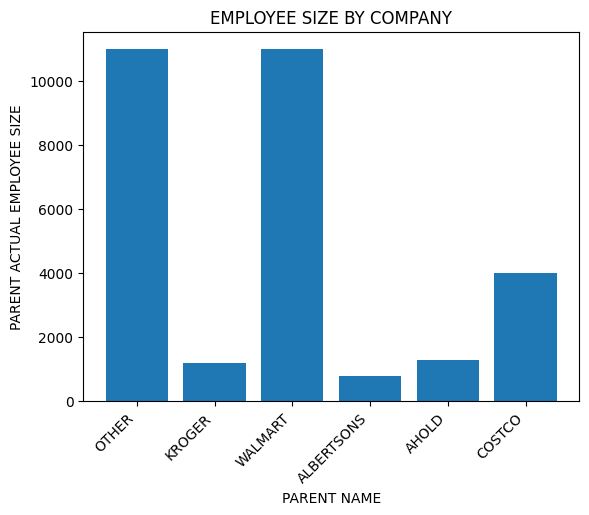

In [30]:
x = supermarkets_2022['PARENT NAME']
y = supermarkets_2022['PARENT ACTUAL EMPLOYEE SIZE']



plt.bar(x, y)
plt.xlabel('PARENT NAME')
plt.ylabel('PARENT ACTUAL EMPLOYEE SIZE')
plt.title('EMPLOYEE SIZE BY COMPANY')
plt.xticks(rotation=45, ha='right')
plt.show()


In [32]:
#Super_markets_GA = supermarkets_2022.groupby('STATE',['GA'])
#Super_markets_GA = supermarkets_2022.groupby(['STATE'] == ['GA'])
Super_markets_GA = supermarkets_2022.query("STATE == 'GA'")
Super_markets_WarnerRobins = supermarkets_2022.query("CITY =='WARNER ROBINS'")
Super_markets_WarnerRobins

Super_markets_Macon = supermarkets_2022.query()
#Super_Markets_Hull = Super_markets_GA.query("CITY == 'HULL'")
#Super_Markets_Hull




TypeError: query() missing 1 required positional argument: 'expr'

In [ ]:
'''group by store
group by state
visualize every grocery store in GA?


'''

In [ ]:
#Apply a string match through thefuzz that compares all stores to the parent corporations owned stores
#We decided to use a threshold of 77
#Generates a list of potential unique string matches
#The matches list's length is based on the number of different stores the parent corporation owns
#parent was initialized for each parent coporation (finished at costco)

parent = costco
companies = stores_2022["COMPANY"]

matches = []
for item in parent:
    for result in process.extract(item, companies, limit=len(parent)+1):
        store = result[0]
        score = result[1]
        if score >= 77 and store not in matches:
            matches.append(store)

print(matches)

# i.e. returns: ['COSTCO DELI']


In [20]:
#Create lists of Supermarkets/Companies owned by the Parent Coporations of Interest (Supermarkets/Companies were taken from Wikipedia)

#Ahold Delhaize owned supermarkets/companies
ahold = ["Bottom Dollar Food",
    "Food Lion",
    "FreshDirect",
    "Giant",
    "Giant Food",
    "Hannaford",
    "Stop & Shop",
    "Peapod",
    "Bfresh",
    "Eastside Marketplace",]

#WALMART owned supermarkets/companies
walmart = ["WALMART","SAM'S CLUB"]

#Krogers owned supermarkets/companies
kroger = ["Baker's",
    "City Market",
    "Dillons",
    "Food 4 Less",
    "Foods Co.",
    "Fred Meyer",
    "Fry's",
    "Gerbes",
    "Harris Teeter",
    "JayC",
    "King Soopers",
    "Kroger",
    "Mariano's",
    "Metro Market",
    "Pay Less",
    "Pick 'n Save",
    "QFC",
    "Ralphs",
    "Ruler Foods",
    "Smith's",]

# Albertsons owned supermarkets/companies
albertsons= ["Acme Markets",
    "Albertsons",
    "Albertsons Market",
    "Amigos",
    "Andronico's",
    "Balducci's",
    "Carrs",
    "Haggen",
    "Jewel-Osco",
    "Kings Food Markets",
    "Lucky",
    "Market Street",
    "Pak 'n Save",
    "Pavilions",
    "Randalls",
    "Safewa",
    "Shaw's",
    "Star Market",
    "Tom Thumb",
    "United Supermarkets",
    "Vons",
    "Buttrey Food and Drug",
    "Max Food and Drug",
    "Max Foods",
    "Skagg's Albertsons",
    "Super Saver",]

#Costco owned supermarkets/companies
costco = ["Costco"]

In [ ]:
parent = costco
companies = stores_2022["COMPANY"]

matches = []
for item in parent:
    for company in companies:
        if item in company and company not in matches:
            matches.append(company)

print(matches)


In [ ]:

parent = costco
companies = pd.Series(stores_2022["COMPANY"])

matches = []
for item in parent:
    match = companies[companies.str.contains(item, na=False)]
    for company in match:
        if company not in matches:
            matches.append(company)

print(matches)


In [ ]:
parent = costco
companies = stores_2022["COMPANY"]

matches = []
for item in parent:
    for result in process.contains(item, companies, limit=len(parent)+1):
        store = result[0]
        score = result[1]
        if score >= 77 and store not in matches:
            matches.append(store)

print(matches)

In [ ]:
import pandas as pd

# Specify the file path
file_path = 'summer-CAN-2023/Week 2/Tuesday/Untitled Folder/co-est2022-alldata.csv'

# Read the file into a pandas DataFrame
df = pd.read_csv(file_path)

# Display the DataFrame
df




In [22]:
census_counties2022 = pd.read_csv('../rafi-grocery/co-est2022-alldata.csv')
census_counties2022

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,ESTIMATESBASE2020,POPESTIMATE2020,POPESTIMATE2021,POPESTIMATE2022,NPOPCHG2020,NPOPCHG2021,NPOPCHG2022,BIRTHS2020,BIRTHS2021,BIRTHS2022,DEATHS2020,DEATHS2021,DEATHS2022,NATURALCHG2020,NATURALCHG2021,NATURALCHG2022,INTERNATIONALMIG2020,INTERNATIONALMIG2021,INTERNATIONALMIG2022,DOMESTICMIG2020,DOMESTICMIG2021,DOMESTICMIG2022,NETMIG2020,NETMIG2021,NETMIG2022,RESIDUAL2020,RESIDUAL2021,RESIDUAL2022,GQESTIMATESBASE2020,GQESTIMATES2020,GQESTIMATES2021,GQESTIMATES2022,RBIRTH2021,RBIRTH2022,RDEATH2021,RDEATH2022,RNATURALCHG2021,RNATURALCHG2022,RINTERNATIONALMIG2021,RINTERNATIONALMIG2022,RDOMESTICMIG2021,RDOMESTICMIG2022,RNETMIG2021,RNETMIG2022
0,40,3,6,1,0,Alabama,Alabama,5024356,5031362,5049846,5074296,7006,18484,24450,13867,57112,58280,15165,69056,66870,-1298,-11944,-8590,127,1805,4597,9042,27704,28609,9169,29509,33206,-865,919,-166,127918,131155,134475,141319,11.330388,11.513074,13.699945,13.210008,-2.369557,-1.696934,0.358092,0.908126,5.496167,5.651639,5.854259,6.559766
1,50,3,6,1,1,Alabama,Autauga County,58802,58902,59210,59759,100,308,549,162,694,709,177,682,673,-15,12,36,0,15,27,99,240,508,99,255,535,16,41,-22,478,478,478,478,11.751558,11.919071,11.548361,11.313872,0.203197,0.605200,0.253996,0.453900,4.063939,8.540040,4.317936,8.993940
2,50,3,6,1,3,Alabama,Baldwin County,231761,233219,239361,246435,1458,6142,7074,560,2367,2411,593,3044,2909,-33,-677,-498,11,105,315,1592,6969,6982,1603,7074,7297,-112,-255,275,3546,3450,3360,3369,10.017352,9.925977,12.882475,11.976220,-2.865123,-2.050243,0.444369,1.296841,29.493419,28.744576,29.937788,30.041417
3,50,3,6,1,5,Alabama,Barbour County,25224,24960,24539,24706,-264,-421,167,60,276,277,93,383,372,-33,-107,-95,0,0,4,-195,-308,243,-195,-308,247,-36,-6,15,2716,2475,2244,2701,11.151740,11.249873,15.475060,15.108133,-4.323320,-3.858260,0.000000,0.162453,-12.444696,9.869022,-12.444696,10.031475
4,50,3,6,1,7,Alabama,Bibb County,22300,22183,22370,22005,-117,187,-365,56,244,248,55,318,321,1,-74,-73,0,1,2,-107,259,-301,-107,260,-299,-11,1,7,2147,2063,2002,2033,10.953247,11.177465,14.275133,14.467606,-3.321886,-3.290141,0.044890,0.090141,11.626602,-13.566197,11.671492,-13.476056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190,50,4,8,56,37,Wyoming,Sweetwater County,42267,42190,41582,41345,-77,-608,-237,113,454,453,95,424,436,18,30,17,1,17,48,-95,-641,-297,-94,-624,-249,-1,-14,-5,670,670,635,635,10.838944,10.925272,10.122714,10.515272,0.716230,0.409999,0.405864,1.157645,-15.303443,-7.162926,-14.897579,-6.005282
3191,50,4,8,56,39,Wyoming,Teton County,23323,23377,23622,23287,54,245,-335,62,220,216,17,93,105,45,127,111,2,6,25,6,107,-476,8,113,-451,1,5,5,281,281,281,281,9.361901,9.209320,3.957531,4.476753,5.404370,4.732567,0.255325,1.065894,4.553288,-20.294613,4.808613,-19.228719
3192,50,4,8,56,41,Wyoming,Uinta County,20446,20457,20655,20712,11,198,57,58,227,226,43,185,199,15,42,27,0,0,-4,-9,147,42,-9,147,38,5,9,-8,217,217,230,230,11.043004,10.926584,8.999805,9.621196,2.043199,1.305388,0.000000,-0.193391,7.151197,2.030604,7.151197,1.837213
3193,50,4,8,56,43,Wyoming,Washakie County,7682,7658,7712,7719,-24,54,7,19,73,75,32,110,115,-13,-37,-40,0,0,-1,-10,92,52,-10,92,51,-1,-1,-4,144,144,144,144,9.499024,9.720692,14.313598,14.905061,-4.814574,-5.184369,0.000000,-0.129609,11.971373,6.739680,11.971373,6.610071


In [24]:
census_IL2022 = census_counties2022[(census_counties2022['STNAME']=='Illinois')]
census_IL2022


,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,ESTIMATESBASE2020,POPESTIMATE2020,POPESTIMATE2021,POPESTIMATE2022,NPOPCHG2020,NPOPCHG2021,NPOPCHG2022,BIRTHS2020,BIRTHS2021,BIRTHS2022,DEATHS2020,DEATHS2021,DEATHS2022,NATURALCHG2020,NATURALCHG2021,NATURALCHG2022,INTERNATIONALMIG2020,INTERNATIONALMIG2021,INTERNATIONALMIG2022,DOMESTICMIG2020,DOMESTICMIG2021,DOMESTICMIG2022,NETMIG2020,NETMIG2021,NETMIG2022,RESIDUAL2020,RESIDUAL2021,RESIDUAL2022,GQESTIMATESBASE2020,GQESTIMATES2020,GQESTIMATES2021,GQESTIMATES2022,RBIRTH2021,RBIRTH2022,RDEATH2021,RDEATH2022,RNATURALCHG2021,RNATURALCHG2022,RINTERNATIONALMIG2021,RINTERNATIONALMIG2022,RDOMESTICMIG2021,RDOMESTICMIG2022,RNETMIG2021,RNETMIG2022
610,40,2,3,17,0,Illinois,Illinois,12812545,12786580,12686469,12582032,-25965,-100111,-104437,33454,131658,131491,35347,128282,126625,-1893,3376,4866,507,11436,31529,-24768,-115624,-141656,-24261,-104188,-110127,189,701,824,275397,275450,275526,275348,10.337043,10.407503,10.071978,10.022359,0.265064,0.385144,0.897890,2.495518,-9.078144,-11.212062,-8.180254,-8.716544
611,50,2,3,17,1,Illinois,Adams County,65727,65612,65146,64725,-115,-466,-421,169,746,746,179,861,851,-10,-115,-105,0,2,-4,-106,-377,-296,-106,-375,-300,1,24,-16,1626,1626,1624,1627,11.410392,11.488323,13.169366,13.105312,-1.758975,-1.616989,0.030591,-0.061600,-5.766378,-4.558369,-5.735787,-4.619969
612,50,2,3,17,3,Illinois,Alexander County,5242,5173,5032,4858,-69,-141,-174,10,55,56,23,113,115,-13,-58,-59,0,0,0,-52,-79,-118,-52,-79,-118,-4,-4,3,82,82,82,82,10.779030,11.324570,22.146007,23.255814,-11.366977,-11.931244,0.000000,0.000000,-15.482607,-23.862487,-15.482607,-23.862487
613,50,2,3,17,5,Illinois,Bond County,16729,16688,16633,16566,-41,-55,-67,44,143,144,47,199,197,-3,-56,-53,0,3,9,-36,-15,-15,-36,-12,-6,-2,13,-8,2362,2361,2352,2365,8.583176,8.674960,11.944419,11.867827,-3.361244,-3.192867,0.180067,0.542185,-0.900333,-0.903642,-0.720266,-0.361457
614,50,2,3,17,7,Illinois,Boone County,53446,53334,53199,53154,-112,-135,-45,135,528,532,118,477,485,17,51,47,0,-3,-2,-121,-198,-76,-121,-201,-78,-8,15,-14,267,267,267,267,9.912422,10.004419,8.954972,9.120570,0.957450,0.883849,-0.056321,-0.037611,-3.717158,-1.429203,-3.773479,-1.466813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
708,50,2,3,17,195,Illinois,Whiteside County,55691,55553,55342,54658,-138,-211,-684,161,583,585,188,799,783,-27,-216,-198,0,18,42,-107,-44,-532,-107,-26,-490,-4,31,4,955,955,955,955,10.514451,10.636364,14.410028,14.236364,-3.895577,-3.600000,0.324631,0.763636,-0.793543,-9.672727,-0.468912,-8.909091
709,50,2,3,17,197,Illinois,Will County,696362,695844,697985,696757,-518,2141,-1228,1702,6748,6727,1591,5695,5599,111,1053,1128,4,371,954,-684,262,-3289,-680,633,-2335,51,455,-21,8588,8587,8581,8583,9.682680,9.646228,8.171734,8.028725,1.510946,1.617503,0.532347,1.367995,0.375943,-4.716284,0.908289,-3.348290
710,50,2,3,17,199,Illinois,Williamson County,67154,67113,66943,66695,-41,-170,-248,158,661,664,193,855,844,-35,-194,-180,0,26,57,-20,-44,-101,-20,-18,-44,14,42,-24,2035,2035,2035,2035,9.861550,9.937293,12.755863,12.631138,-2.894313,-2.693845,0.387898,0.853051,-0.656442,-1.511546,-0.268544,-0.658495
711,50,2,3,17,201,Illinois,Winnebago County,285350,284928,283559,282188,-422,-1369,-1371,824,3316,3313,868,3393,3350,-44,-77,-37,3,230,586,-395,-1622,-1888,-392,-1392,-1302,14,100,-32,3602,3601,3603,3603,11.666054,11.711949,11.936948,11.842749,-0.270894,-0.130801,0.809165,2.071597,-5.706375,-6.674362,-4.897210,-4.602764


In [23]:
 supermarkets_2022.query('')

,COMPANY,ADDRESS LINE 1,CITY,STATE,ZIPCODE,ZIP4,COUNTY CODE,AREA CODE,IDCODE,LOCATION EMPLOYEE SIZE CODE,LOCATION SALES VOLUME CODE,PRIMARY SIC CODE,SIC6_DESCRIPTIONS,PRIMARY NAICS CODE,NAICS8 DESCRIPTIONS,SIC CODE,SIC6_DESCRIPTIONS (SIC),SIC CODE 1,SIC6_DESCRIPTIONS (SIC1),SIC CODE 2,SIC6_DESCRIPTIONS(SIC2),SIC CODE 3,SIC6_DESCRIPTIONS(SIC3),SIC CODE 4,SIC6_DESCRIPTIONS(SIC4),ARCHIVE VERSION YEAR,YELLOW PAGE CODE,EMPLOYEE SIZE (5) - LOCATION,SALES VOLUME (9) - LOCATION,BUSINESS STATUS CODE,INDUSTRY SPECIFIC FIRST BYTE,YEAR ESTABLISHED,OFFICE SIZE CODE,COMPANY HOLDING STATUS,ABI,SUBSIDIARY NUMBER,PARENT NUMBER,PARENT ACTUAL EMPLOYEE SIZE,PARENT ACTUAL SALES VOLUME,PARENT EMPLOYEE SIZE CODE,PARENT SALES VOLUME CODE,SITE NUMBER,ADDRESS TYPE INDICATOR,POPULATION CODE,CENSUS TRACT,CENSUS BLOCK,LATITUDE,LONGITUDE,MATCH CODE,CBSA CODE,CBSA LEVEL,CSA CODE,FIPS CODE,PARENT NAME
2,EL SOL MARKET,110 W MAIN ST,WESTMORLAND,CA,92281,NaN,25.0,760,2,B,C,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,39106.0,5.0,1061.0,9,NaN,NaN,NaN,NaN,519605455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,10200.0,1.0,33.051800,-115.581800,X,20940.0,2.0,0.0,6025.0,OTHER
3,COOL SPRINGS GROCERY,241 WILDWOOD ST,MORGANTOWN,WV,26505,3141.0,61.0,304,2,A,A,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,39106.0,2.0,382.0,9,NaN,NaN,NaN,NaN,817953730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,10400.0,4.0,39.652885,-79.986398,P,34060.0,2.0,390.0,54061.0,OTHER
5,EL SOL MEAT MARKET,1100 MEADOWS RD # B,CALEXICO,CA,92231,5917.0,25.0,760,2,D,E,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,542107.0,MEAT-RETAIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,29.0,6153.0,9,NaN,NaN,NaN,NaN,995912391,NaN,NaN,NaN,NaN,NaN,NaN,995912391.0,NaN,7,12002.0,2.0,32.679923,-115.482166,P,20940.0,2.0,0.0,6025.0,OTHER
7,KROGER,1600 S OHIO ST,MARTINSVILLE,IN,46151,3317.0,109.0,765,2,F,G,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,39106.0,102.0,21931.0,2,P,NaN,NaN,NaN,140765967,NaN,7521503.0,1200.0,137888000.0,I,I,140765967.0,NaN,7,510701.0,2.0,39.411880,-86.425148,P,26900.0,2.0,294.0,18109.0,KROGER
8,FOOD 4 LESS,2420 COTTONWOOD DR,EL CENTRO,CA,92243,1604.0,25.0,760,2,E,F,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,39106.0,70.0,14851.0,2,ï¿½,NaN,NaN,NaN,215261702,402627138.0,7521503.0,1200.0,137888000.0,I,I,215261702.0,NaN,7,11201.0,1.0,32.815719,-115.572166,P,20940.0,2.0,0.0,6025.0,KROGER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203492,WRAY'S MARKETFRESH IGA,401 W NOB HILL BLVD,YAKIMA,WA,98902,4634.0,77.0,509,2,E,F,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,39106.0,50.0,12261.0,2,L,NaN,NaN,NaN,175369438,NaN,175380120.0,150.0,48500.0,F,G,NaN,NaN,7,700.0,3.0,46.585786,-120.510380,P,49420.0,2.0,0.0,53077.0,OTHER
203493,SAFEWAY,2204 W NOB HILL BLVD # A,YAKIMA,WA,98902,6200.0,77.0,509,2,F,G,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,546102.0,BAKERS-RETAIL,599201.0,FLORISTS-RETAIL,592102.0,LIQUORS-RETAIL,NaN,NaN,NaN,NaN,2022,NaN,145.0,35556.0,2,V,NaN,NaN,NaN,840802979,9606492.0,5995907.0,800.0,NaN,H,NaN,840802979.0,NaN,7,1100.0,1.0,46.584035,-120.539230,P,49420.0,2.0,0.0,53077.0,ALBERTSONS
203497,T-MART,103 SUNRISE DR,SUNRISE BEACH,TX,78643,9287.0,299.0,325,2,A,A,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,343201.0,PLUMBING FIXTURES & SUPPLIES-MFRS,572222.0,PUMPS-RETAIL,508444.0,PUMPS (WHLS),525104.0,HARDWARE-RETAIL,594131.0,FIS

In [36]:
census_IL2022[['CTYNAME', 'STATE', 'STNAME']]

,CTYNAME,STATE,STNAME
610,Illinois,17,Illinois
611,Adams County,17,Illinois
612,Alexander County,17,Illinois
613,Bond County,17,Illinois
614,Boone County,17,Illinois
...,...,...,...
708,Whiteside County,17,Illinois
709,Will County,17,Illinois
710,Williamson County,17,Illinois
711,Winnebago County,17,Illinois


In [38]:
#Super_markets_IL = supermarkets_2022.query("STATE =='IL'")
#Super_markets_IL.replace(IL)

Super_markets_IL = supermarkets_2022.query("STATE =='IL'")

# Replace 'IL' with 'Illinois'
Super_markets_IL = Super_markets_IL.replace('IL', 'Illinois')
Super_markets_IL


,COMPANY,ADDRESS LINE 1,CITY,STATE,ZIPCODE,ZIP4,COUNTY CODE,AREA CODE,IDCODE,LOCATION EMPLOYEE SIZE CODE,LOCATION SALES VOLUME CODE,PRIMARY SIC CODE,SIC6_DESCRIPTIONS,PRIMARY NAICS CODE,NAICS8 DESCRIPTIONS,SIC CODE,SIC6_DESCRIPTIONS (SIC),SIC CODE 1,SIC6_DESCRIPTIONS (SIC1),SIC CODE 2,SIC6_DESCRIPTIONS(SIC2),SIC CODE 3,SIC6_DESCRIPTIONS(SIC3),SIC CODE 4,SIC6_DESCRIPTIONS(SIC4),ARCHIVE VERSION YEAR,YELLOW PAGE CODE,EMPLOYEE SIZE (5) - LOCATION,SALES VOLUME (9) - LOCATION,BUSINESS STATUS CODE,INDUSTRY SPECIFIC FIRST BYTE,YEAR ESTABLISHED,OFFICE SIZE CODE,COMPANY HOLDING STATUS,ABI,SUBSIDIARY NUMBER,PARENT NUMBER,PARENT ACTUAL EMPLOYEE SIZE,PARENT ACTUAL SALES VOLUME,PARENT EMPLOYEE SIZE CODE,PARENT SALES VOLUME CODE,SITE NUMBER,ADDRESS TYPE INDICATOR,POPULATION CODE,CENSUS TRACT,CENSUS BLOCK,LATITUDE,LONGITUDE,MATCH CODE,CBSA CODE,CBSA LEVEL,CSA CODE,FIPS CODE,PARENT NAME
13,KROGER,301 E MCKINLEY RD,OTTAWA,Illinois,61350,4805.0,99.0,815,2,E,F,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,39106.0,70.0,14158.0,2,P,NaN,NaN,NaN,152123287,NaN,7521503.0,1200.0,137888000.0,I,I,152123287.0,NaN,7,963500.0,1.0,41.323858,-88.836271,P,36837.0,1.0,176.0,17099.0,KROGER
199,SPRING VALLEY SUPERMARKET,117 S SPALDING ST,SPRING VALLEY,Illinois,61362,2097.0,11.0,815,2,E,E,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,542107.0,MEAT-RETAIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,39106.0,60.0,8908.0,9,NaN,NaN,NaN,NaN,2994101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,965200.0,2.0,41.323951,-89.199282,P,36837.0,1.0,176.0,17011.0,OTHER
316,SENECA FOOD MART,271 S MAIN ST,SENECA,Illinois,61360,9415.0,99.0,815,2,B,C,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,209903.0,FOOD PRODUCTS & MANUFACTURERS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,39106.0,8.0,1618.0,2,NaN,NaN,NaN,NaN,152142808,NaN,558247.0,75.0,1385280.0,E,K,NaN,NaN,4,963700.0,1.0,41.306622,-88.610207,P,36837.0,1.0,176.0,17099.0,OTHER
379,HANDY FOODS,604 W MAIN ST,OTTAWA,Illinois,61350,2718.0,99.0,815,2,E,F,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,39106.0,90.0,19214.0,9,L,1963.0,NaN,NaN,152124368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,962800.0,4.0,41.346474,-88.848812,P,36837.0,1.0,176.0,17099.0,OTHER
435,SULLIVAN'S FOODS,1102 MERIDEN ST,MENDOTA,Illinois,61342,1054.0,99.0,815,2,E,F,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,39106.0,72.0,14562.0,2,NaN,1967.0,NaN,NaN,2971463,NaN,356801134.0,NaN,389500.0,NaN,I,2971463.0,NaN,5,961900.0,3.0,41.555409,-89.125462,0,36837.0,1.0,176.0,17099.0,OTHER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202973,ALDI,3320B W BELMONT AVE,CHICAGO,Illinois,60618,NaN,31.0,773,2,C,D,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,10.0,2556.0,2,A,NaN,NaN,NaN,707740021,NaN,200026573.0,150.0,1200000.0,F,K,NaN,NaN,8,160700.0,3.0,41.946900,-87.702300,X,16980.0,2.0,176.0,17031.0,OTHER
203310,WALMART NEIGHBORHOOD MARKET,2844 N BROADWAY ST,CHICAGO,Illinois,60657,6017.0,31.0,773,2,E,F,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,609910.0,MONEY TRANSFER SERVICE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,39106.0,65.0,16611.0,2,ï¿½,NaN,NaN,NaN,425296737,632353488.0,5889993.0,11000.0,572754000.0,K,K,425296737.0,NaN,8,63400.0,1.0,41.933873,-87.644702,P,16980.0,2.0,176.0,17031.0,OTHER
203333,LAKEVIEW FOODS INC,4106 N SHERIDAN RD,CHICAGO,Illinois,60613,2007.0,31.0,773,2,B,C,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,391

In [39]:
df1 = Super_markets_IL

df2 = census_IL2022

merged_df = pd.merge(df1,df2,)

print(merged_df)

ValueError: You are trying to merge on object and int64 columns. If you wish to proceed you should use pd.concat